<a href="https://colab.research.google.com/github/Nicolieolieolie/Project/blob/main/CorrectingTitrationData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
## Solving the Correction Issue
---

One of the greatest hinderances to research is, without a doubt, data anaylsis. The time scientists take to analyze data often pushes back efforts to move on with projects. Even after data analysis, certain discoveries can be made that could have circumvented the need to analyze said data. Thus, any efforts to speed up data analysis can prove to be invaluable. In the Robinson group, one pitfall has been correcting the data received after titrations. The value of the pH that is recieved from the titrator, must be corrected to account for the pH meter that is calibrated every few months. 
Thus, I have generated code here that can be used to correct as many user input files of titration data (generated as .txt files) and save them as .hdq files (the preferred method of the program we use for analyzing data). This code is very special because it can correct an infinite number of files. 



Furthermore, I would like to address the informality of the language throughout this code. This will be used by current and future members of the Robinson group. Therefore, I would like it to be welcoming and kind. This also explains why the contact information is present at the end of the code. 

Hello! :) Firstly, I would like to preface with some helpful reminders before we correct your data. Please make sure your .csv files are placed in your google drive in one folder (Yup! Just one! Make sure you also know where/ what folders they are located in. It might be helpful to simply follow this format: 
/content/drive/My Drive/Titrator
You also might find it helpful to mount the drive first and click the blue text and see if that is your desired folder! 
For Organization Purposes, a new folder titled "Original Files from the Titrator" will be generated with your original files.  


The files can just be dragged from the USB (located in the back of the titrator). 
They are located in the folder 916 and will be labeled PC_LIMS_Report.
Also, this code asks for the slope-intercept formula. This should come from the calibration method listed in the lab notebook. If you run into issues with this please contact me!!! 

In [8]:
import os
import shutil
from google.colab import drive

drive.mount('/content/drive')

folder_path = input("What folder are your titration files located in?")

m = float(input("Please enter the slope generated after calibration "))
b = float(input("Please enter the y-intercept generated after calibration "))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
What folder are your titration files located in?/content/drive/My Drive/Titrator
Please enter the slope generated after calibration 2
Please enter the y-intercept generated after calibration 3


In [9]:
original_folder = os.path.join(folder_path, "Original Files from the Titrator")
os.makedirs(original_folder, exist_ok=True)


for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        original_file_path = os.path.join(original_folder, filename)
        shutil.copyfile(file_path, original_file_path)

        with open(file_path, "r", encoding='latin-1') as file:
            lines = file.readlines()

        should_update = False
        for i, line in enumerate(lines):
            if "$S Mode 1" in line:
                should_update = True
            elif "$E" in line:
                should_update = False
            elif should_update:
                line_parts = line.split()
                if len(line_parts) >= 3:
                    try:
                        float(line_parts[2])
                        new_value = m * float(line_parts[2]) + b 
                        line_parts[2] = '%.3f' % new_value 
                        lines[i] = "\t".join(line_parts) + "\n" 
                    except ValueError:
                        print("L")
                        continue

        corrected_file_path = os.path.join(folder_path, filename[:-4] + "_corrected.txt")
        with open(corrected_file_path, "w", encoding='latin-1', newline='\r\n') as file:
            file.writelines(lines)
        shutil.move(file_path, original_file_path)


print("Your corrected files are completed :)")

L
Your corrected files are completed :)


#Thank you for using my code! 

---

Please feel free to contact me if you run into any issues at all!
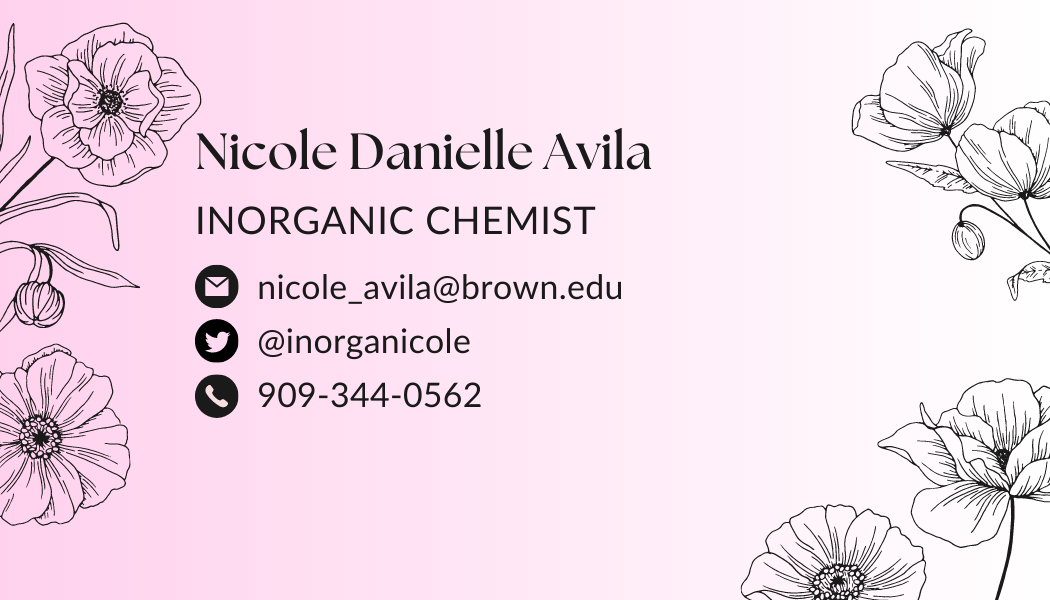